<a href="https://colab.research.google.com/github/Maximus125/Predicting_Loan/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## *Reading the data*

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## *Looking into the data*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

## *Dividing the data into input features and target variables*

In [5]:
y = df['Loan_Status']
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)

In [6]:
print(X.shape)
print(y.shape)

(614, 11)
(614,)


## *Lets check for Null Values*

In [7]:
print(X.isnull().sum())
print(y.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64
0


In [8]:
# So some features of training set has indeed Null Values
# Some features are Numerical whereas some are Categorical
# We need to deal with it accordingly

In [9]:
X['ApplicantIncome'].fillna(X['ApplicantIncome'].median(), inplace=True)
X['CoapplicantIncome'].fillna(X['CoapplicantIncome'].median(), inplace=True)
X['LoanAmount'].fillna(X['LoanAmount'].median(), inplace=True)
X['Loan_Amount_Term'].fillna(X['Loan_Amount_Term'].median(), inplace=True)
X['Credit_History'].fillna(X['Credit_History'].median(), inplace=True)

In [10]:
X.isnull().sum()
# Looking at the numerical features we see there's no null values now

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [11]:
# Lets do the same with categorical features
X['Gender'].fillna(X['Gender'].mode()[0], inplace=True)
X['Married'].fillna(X['Married'].mode()[0], inplace=True)
X['Dependents'].fillna(X['Dependents'].mode()[0], inplace=True)
X['Self_Employed'].fillna(X['Self_Employed'].mode()[0], inplace=True)

In [12]:
X.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [13]:
# So no Null Values in our input set

## *Changing Categorical Features into Numerical Features*

In [14]:
X['Gender'] = X['Gender'].map({'Male':0, 'Female':1})     

#Doing the same thing for every other Categorical features

In [15]:
X['Married'] = X['Married'].map({'No':0, 'Yes':1})
X['Dependents'] = X['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
X['Education'] = X['Education'].map({'Graduate':1, 'Not Graduate':0})
X['Self_Employed'] = X['Self_Employed'].map({'No':0, 'Yes':1})
X['Property_Area'] = X['Property_Area'].map({'Rural':0, 'Semiurban':1, 'Urban':2})

In [16]:
X.head()

#Categorical features for X has been converted to numerical

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2


In [17]:
y = y.map({'Y':1, 'N':0})

#Categorical feature in the y is now converted into numerical

In [18]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

## *Splitting the datset into training and testing dataset*

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


## *Defining the Neural Network Model for the problem*

In [21]:
# We will use Keras to define our model. So lets import that
import keras
keras.__version__

'2.4.3'

In [22]:
# We will also use Tensorflow at the backend. So lets imprt that also
import tensorflow as tf
tf.__version__

'2.3.0'

In [23]:
X_train.shape

(491, 11)

In [24]:
from keras import models
from keras import layers

In [25]:
# No. of Neurons in Input Layer = 12 (bcz X_train has 12 features)
# No. of Hidden Layers set to 2
# 1st Hidden Layer consists of 12 neurons
# 2nd Hidden Layer consists of 6 Neurons
# Finally Output Layer cosnsits of 1 Neuron bcz its a Binary Classfication Problem i.e. Yes/No

model = models.Sequential()
model.add(layers.InputLayer(input_shape = (11,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


## *Compiling the Model*

In [27]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## *Training our Model*

In [28]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
16/16 [==============================] - 0s 16ms/step - loss: 449.8744 - accuracy: 0.3198 - val_loss: 307.4596 - val_accuracy: 0.2927
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 313.9131 - accuracy: 0.3238 - val_loss: 212.2970 - val_accuracy: 0.3171
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 209.3788 - accuracy: 0.3177 - val_loss: 132.2764 - val_accuracy: 0.3415
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 125.1959 - accuracy: 0.4236 - val_loss: 74.5073 - val_accuracy: 0.4309
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 65.6923 - accuracy: 0.4929 - val_loss: 32.3512 - val_accuracy: 0.4715
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 22.2905 - accuracy: 0.5438 - val_loss: 2.0972 - val_accuracy: 0.6179
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 1.0263 - accuracy: 0.6701 - val_loss: 0.6591 - val_accuracy: 0.7073
E

## *Plotting training and validation loss*

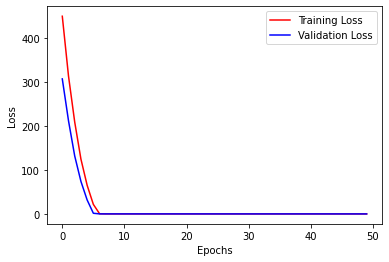

In [29]:
plt.plot(history.history['loss'],'r', label='Training Loss')
plt.plot(history.history['val_loss'],'b', label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

## *Plotting Training and Validation Accuracy*

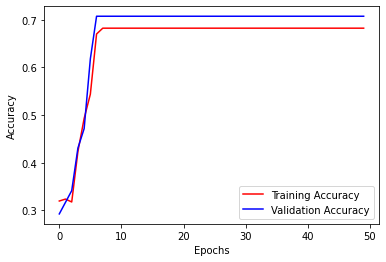

In [30]:
plt.plot(history.history['accuracy'],'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()